<a href="https://colab.research.google.com/github/020/020.github.io/blob/master/Beds_Occupancy_LSTM_TS_exp_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
keras = tf.keras

In [3]:
df = pd.read_csv('/content/beds_occupied.csv')
df

,date,occupied
0,11/05/2022 0:00,0.79
1,11/05/2022 1:00,0.79
2,11/05/2022 2:00,0.80
3,11/05/2022 3:00,0.80
4,11/05/2022 4:00,0.80
...,...,...
1995,02/08/2022 3:00,0.81
1996,02/08/2022 4:00,0.82
1997,02/08/2022 5:00,0.82
1998,02/08/2022 6:00,0.82


In [4]:
df.index = pd.to_datetime(df['date'], format='%d/%m/%Y %H:%M')
df[:26]

,date,occupied
date,,
2022-05-11 00:00:00,11/05/2022 0:00,0.79
2022-05-11 01:00:00,11/05/2022 1:00,0.79
2022-05-11 02:00:00,11/05/2022 2:00,0.80
2022-05-11 03:00:00,11/05/2022 3:00,0.80
2022-05-11 04:00:00,11/05/2022 4:00,0.80
2022-05-11 05:00:00,11/05/2022 5:00,0.80
2022-05-11 06:00:00,11/05/2022 6:00,0.81
2022-05-11 07:00:00,11/05/2022 7:00,0.81
2022-05-11 08:00:00,11/05/2022 8:00,0.81


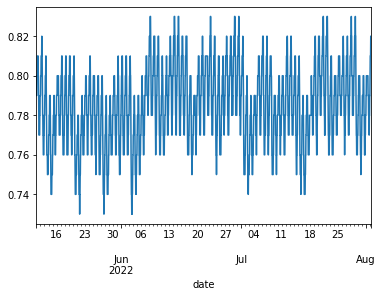

In [5]:
bed = df['occupied']
bed.plot()

In [6]:
def df_to_X_y(df, window_size=30):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [7]:
WINDOW_SIZE = 5
X1, y1 = df_to_X_y(bed, WINDOW_SIZE)
X1.shape, y1.shape

((1995, 5, 1), (1995,))

In [8]:
X_train1, y_train1 = X1[:1500], y1[:1500]
X_val1, y_val1 = X1[1500:1750], y1[1500:1750]
X_test1, y_test1 = X1[1750:], y1[1750:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((1500, 5, 1), (1500,), (250, 5, 1), (250,), (245, 5, 1), (245,))

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((5, 1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [36]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

In [47]:
model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=100, callbacks=[cp1])

Epoch 1/100
47/47 [==============================] - 3s 16ms/step - loss: 2.3114e-04 - root_mean_squared_error: 0.0152 - val_loss: 3.8738e-05 - val_root_mean_squared_error: 0.0062
Epoch 2/100
47/47 [==============================] - 0s 5ms/step - loss: 4.0031e-05 - root_mean_squared_error: 0.0063 - val_loss: 4.7167e-05 - val_root_mean_squared_error: 0.0069
Epoch 3/100
47/47 [==============================] - 0s 6ms/step - loss: 3.9125e-05 - root_mean_squared_error: 0.0063 - val_loss: 3.8304e-05 - val_root_mean_squared_error: 0.0062
Epoch 4/100
47/47 [==============================] - 0s 6ms/step - loss: 3.6360e-05 - root_mean_squared_error: 0.0060 - val_loss: 4.2732e-05 - val_root_mean_squared_error: 0.0065
Epoch 5/100
47/47 [==============================] - 0s 6ms/step - loss: 3.9124e-05 - root_mean_squared_error: 0.0063 - val_loss: 3.9271e-05 - val_root_mean_squared_error: 0.0063
Epoch 6/100
47/47 [==============================] - 0s 6ms/step - loss: 3.5279e-05 - root_mean_squared_

47/47 [==============================] - 5s 103ms/step - loss: 4.0389e-05 - root_mean_squared_error: 0.0064 - val_loss: 3.6243e-05 - val_root_mean_squared_error: 0.0060
Epoch 21/100
47/47 [==============================] - 0s 6ms/step - loss: 3.7358e-05 - root_mean_squared_error: 0.0061 - val_loss: 3.7438e-05 - val_root_mean_squared_error: 0.0061
Epoch 22/100
47/47 [==============================] - 0s 6ms/step - loss: 3.7955e-05 - root_mean_squared_error: 0.0062 - val_loss: 3.6889e-05 - val_root_mean_squared_error: 0.0061
Epoch 23/100
47/47 [==============================] - 0s 6ms/step - loss: 4.7643e-05 - root_mean_squared_error: 0.0069 - val_loss: 3.8205e-05 - val_root_mean_squared_error: 0.0062
Epoch 24/100
47/47 [==============================] - 0s 5ms/step - loss: 4.0353e-05 - root_mean_squared_error: 0.0064 - val_loss: 3.8944e-05 - val_root_mean_squared_error: 0.0062
Epoch 25/100
47/47 [==============================] - 0s 6ms/step - loss: 3.9867e-05 - root_mean_squared_error:

47/47 [==============================] - 4s 93ms/step - loss: 4.0916e-05 - root_mean_squared_error: 0.0064 - val_loss: 3.5767e-05 - val_root_mean_squared_error: 0.0060
Epoch 33/100
47/47 [==============================] - 0s 5ms/step - loss: 3.7445e-05 - root_mean_squared_error: 0.0061 - val_loss: 3.6361e-05 - val_root_mean_squared_error: 0.0060
Epoch 34/100
47/47 [==============================] - 0s 6ms/step - loss: 3.7488e-05 - root_mean_squared_error: 0.0061 - val_loss: 4.2229e-05 - val_root_mean_squared_error: 0.0065
Epoch 35/100
47/47 [==============================] - 0s 6ms/step - loss: 4.4106e-05 - root_mean_squared_error: 0.0066 - val_loss: 4.4336e-05 - val_root_mean_squared_error: 0.0067
Epoch 36/100
47/47 [==============================] - 0s 6ms/step - loss: 3.9894e-05 - root_mean_squared_error: 0.0063 - val_loss: 3.8357e-05 - val_root_mean_squared_error: 0.0062
Epoch 37/100
47/47 [==============================] - 0s 6ms/step - loss: 4.1049e-05 - root_mean_squared_error: 

47/47 [==============================] - 5s 105ms/step - loss: 3.9003e-05 - root_mean_squared_error: 0.0062 - val_loss: 3.5568e-05 - val_root_mean_squared_error: 0.0060
Epoch 39/100
47/47 [==============================] - 0s 6ms/step - loss: 4.5455e-05 - root_mean_squared_error: 0.0067 - val_loss: 7.3242e-05 - val_root_mean_squared_error: 0.0086
Epoch 40/100
47/47 [==============================] - 0s 6ms/step - loss: 5.0272e-05 - root_mean_squared_error: 0.0071 - val_loss: 3.6956e-05 - val_root_mean_squared_error: 0.0061
Epoch 41/100
47/47 [==============================] - 0s 6ms/step - loss: 3.7749e-05 - root_mean_squared_error: 0.0061 - val_loss: 4.3832e-05 - val_root_mean_squared_error: 0.0066
Epoch 42/100
47/47 [==============================] - 0s 6ms/step - loss: 3.8705e-05 - root_mean_squared_error: 0.0062 - val_loss: 3.6880e-05 - val_root_mean_squared_error: 0.0061
Epoch 43/100
47/47 [==============================] - 0s 6ms/step - loss: 3.7997e-05 - root_mean_squared_error:

47/47 [==============================] - 4s 93ms/step - loss: 4.0084e-05 - root_mean_squared_error: 0.0063 - val_loss: 3.5109e-05 - val_root_mean_squared_error: 0.0059
Epoch 58/100
47/47 [==============================] - 0s 6ms/step - loss: 3.6398e-05 - root_mean_squared_error: 0.0060 - val_loss: 4.2986e-05 - val_root_mean_squared_error: 0.0066
Epoch 59/100
47/47 [==============================] - 0s 6ms/step - loss: 4.6013e-05 - root_mean_squared_error: 0.0068 - val_loss: 4.0704e-05 - val_root_mean_squared_error: 0.0064
Epoch 60/100
47/47 [==============================] - 0s 6ms/step - loss: 5.2868e-05 - root_mean_squared_error: 0.0073 - val_loss: 3.7366e-05 - val_root_mean_squared_error: 0.0061
Epoch 61/100
47/47 [==============================] - 0s 6ms/step - loss: 4.3172e-05 - root_mean_squared_error: 0.0066 - val_loss: 3.5592e-05 - val_root_mean_squared_error: 0.0060
Epoch 62/100
47/47 [==============================] - 0s 6ms/step - loss: 3.9832e-05 - root_mean_squared_error: 

47/47 [==============================] - 4s 93ms/step - loss: 3.5528e-05 - root_mean_squared_error: 0.0060 - val_loss: 3.4727e-05 - val_root_mean_squared_error: 0.0059
Epoch 71/100
47/47 [==============================] - 0s 6ms/step - loss: 3.7930e-05 - root_mean_squared_error: 0.0062 - val_loss: 4.8175e-05 - val_root_mean_squared_error: 0.0069
Epoch 72/100
47/47 [==============================] - 0s 6ms/step - loss: 4.3402e-05 - root_mean_squared_error: 0.0066 - val_loss: 5.1975e-05 - val_root_mean_squared_error: 0.0072
Epoch 73/100
47/47 [==============================] - 0s 6ms/step - loss: 4.0795e-05 - root_mean_squared_error: 0.0064 - val_loss: 4.0769e-05 - val_root_mean_squared_error: 0.0064
Epoch 74/100
47/47 [==============================] - 0s 6ms/step - loss: 3.9001e-05 - root_mean_squared_error: 0.0062 - val_loss: 3.5014e-05 - val_root_mean_squared_error: 0.0059
Epoch 75/100
47/47 [==============================] - 0s 6ms/step - loss: 3.7512e-05 - root_mean_squared_error: 

47/47 [==============================] - 5s 111ms/step - loss: 4.2051e-05 - root_mean_squared_error: 0.0065 - val_loss: 3.4725e-05 - val_root_mean_squared_error: 0.0059
Epoch 83/100
47/47 [==============================] - 0s 6ms/step - loss: 3.6078e-05 - root_mean_squared_error: 0.0060 - val_loss: 4.3331e-05 - val_root_mean_squared_error: 0.0066
Epoch 84/100
47/47 [==============================] - 0s 6ms/step - loss: 5.4611e-05 - root_mean_squared_error: 0.0074 - val_loss: 7.6112e-05 - val_root_mean_squared_error: 0.0087
Epoch 85/100
47/47 [==============================] - 0s 6ms/step - loss: 4.5609e-05 - root_mean_squared_error: 0.0068 - val_loss: 5.4152e-05 - val_root_mean_squared_error: 0.0074
Epoch 86/100
47/47 [==============================] - 0s 6ms/step - loss: 4.6794e-05 - root_mean_squared_error: 0.0068 - val_loss: 3.5021e-05 - val_root_mean_squared_error: 0.0059
Epoch 87/100
43/47 [==========================>...] - ETA: 0s - loss: 3.3111e-05 - root_mean_squared_error: 0.0

47/47 [==============================] - 4s 95ms/step - loss: 3.2945e-05 - root_mean_squared_error: 0.0057 - val_loss: 3.4409e-05 - val_root_mean_squared_error: 0.0059
Epoch 88/100
47/47 [==============================] - 0s 6ms/step - loss: 3.2798e-05 - root_mean_squared_error: 0.0057 - val_loss: 3.5255e-05 - val_root_mean_squared_error: 0.0059
Epoch 89/100
47/47 [==============================] - 0s 6ms/step - loss: 4.6912e-05 - root_mean_squared_error: 0.0068 - val_loss: 5.9465e-05 - val_root_mean_squared_error: 0.0077
Epoch 90/100
47/47 [==============================] - 0s 6ms/step - loss: 4.4044e-05 - root_mean_squared_error: 0.0066 - val_loss: 3.4755e-05 - val_root_mean_squared_error: 0.0059
Epoch 91/100
47/47 [==============================] - 0s 6ms/step - loss: 3.8567e-05 - root_mean_squared_error: 0.0062 - val_loss: 4.2350e-05 - val_root_mean_squared_error: 0.0065
Epoch 92/100
47/47 [==============================] - 0s 7ms/step - loss: 4.2120e-05 - root_mean_squared_error: 

47/47 [==============================] - 5s 106ms/step - loss: 3.3270e-05 - root_mean_squared_error: 0.0058 - val_loss: 3.4289e-05 - val_root_mean_squared_error: 0.0059
Epoch 96/100
47/47 [==============================] - 0s 6ms/step - loss: 3.9210e-05 - root_mean_squared_error: 0.0063 - val_loss: 3.9729e-05 - val_root_mean_squared_error: 0.0063
Epoch 97/100
47/47 [==============================] - 0s 6ms/step - loss: 4.6621e-05 - root_mean_squared_error: 0.0068 - val_loss: 5.3884e-05 - val_root_mean_squared_error: 0.0073
Epoch 98/100
47/47 [==============================] - 0s 6ms/step - loss: 3.9999e-05 - root_mean_squared_error: 0.0063 - val_loss: 4.6107e-05 - val_root_mean_squared_error: 0.0068
Epoch 99/100
47/47 [==============================] - 0s 6ms/step - loss: 4.6007e-05 - root_mean_squared_error: 0.0068 - val_loss: 5.0999e-05 - val_root_mean_squared_error: 0.0071
Epoch 100/100
47/47 [==============================] - 0s 6ms/step - loss: 4.8422e-05 - root_mean_squared_error

In [48]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/')

In [49]:
train_predictions = model1.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

,Train Predictions,Actuals
0,0.800925,0.80
1,0.799284,0.81
2,0.806874,0.81
3,0.810191,0.81
4,0.809483,0.81
...,...,...
1495,0.809015,0.80
1496,0.795120,0.79
1497,0.782504,0.78
1498,0.772876,0.78


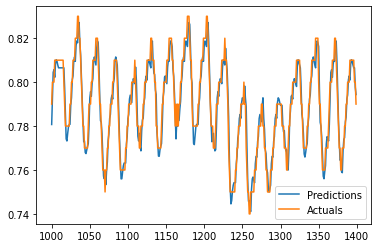

In [50]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][1000:1400], label='Predictions')
plt.plot(train_results['Actuals'][1000:1400], label='Actuals')
plt.legend()

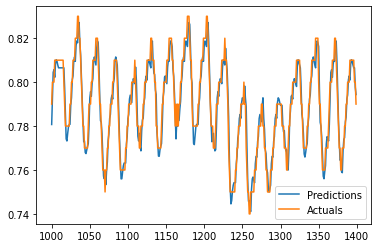

In [51]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][1000:1400], label='Predictions')
plt.plot(train_results['Actuals'][1000:1400], label='Actuals')
plt.legend()

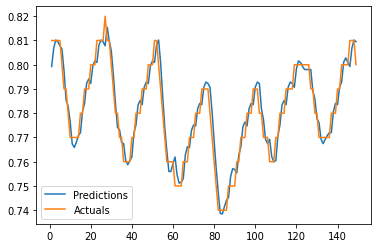

In [52]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][1:150], label='Predictions')
plt.plot(train_results['Actuals'][1:150], label='Actuals')
plt.legend()

In [53]:
keras.metrics.mean_absolute_error(y_train1, train_predictions).numpy()

0.00444382

In [44]:
val_predictions = model1.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val1})
val_results

,Val Predictions,Actuals
0,0.768744,0.77
1,0.767840,0.77
2,0.769134,0.77
3,0.770717,0.77
4,0.772624,0.78
...,...,...
245,0.769274,0.77
246,0.773443,0.77
247,0.776043,0.78
248,0.781263,0.79


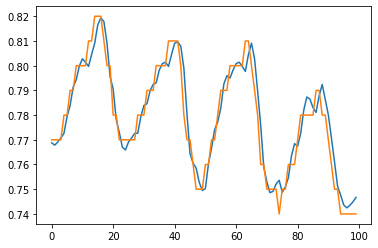

In [45]:
plt.plot(val_results['Val Predictions'][:100])
plt.plot(val_results['Actuals'][:100])

In [46]:
keras.metrics.mean_absolute_error(y_val1, val_predictions).numpy()

0.004776591

In [33]:
test_predictions = model1.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test1})
test_results

,Test Predictions,Actuals
0,0.792901,0.79
1,0.793783,0.80
2,0.796036,0.80
3,0.798334,0.80
4,0.799798,0.81
...,...,...
240,0.808086,0.81
241,0.808875,0.82
242,0.811049,0.82
243,0.813311,0.82


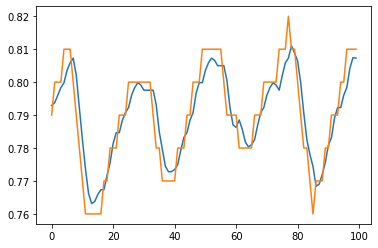

In [34]:
plt.plot(test_results['Test Predictions'][:100])
plt.plot(test_results['Actuals'][:100])

In [35]:
keras.metrics.mean_absolute_error(y_test1, test_predictions).numpy()

0.005367934